In [1]:
# import libraries that will be used throughout the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.DEBUG)

DirBase = "/Volumes/wms_ssd/Qualifying Exam/"

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
logging.debug("READING IN 2016 PROPERTIES...")
properties_2016_df = pd.read_csv(DirBase+"Input/properties_2016_mod.csv")

logging.debug("READING IN 2017 PROPERTIES...")
properties_2017_df = pd.read_csv(DirBase+"Input/properties_2017_mod.csv")

logging.debug("READING IN TRAINING DATA...")
training_2016_df = pd.read_csv(DirBase+"Input/train_2016_v2.csv")
training_2017_df = pd.read_csv(DirBase+"Input/train_2017.csv")

DEBUG:root:READING IN 2016 PROPERTIES...
DEBUG:root:READING IN 2017 PROPERTIES...
DEBUG:root:READING IN TRAINING DATA...


In [3]:
#living area proportions 
properties_2016_df['living_area_prop'] = properties_2016_df['calculatedfinishedsquarefeet'] / properties_2016_df['lotsizesquarefeet']

#tax value ratio
properties_2016_df['value_ratio'] = properties_2016_df['taxvaluedollarcnt'] / properties_2016_df['taxamount']

#tax value proportions
properties_2016_df['value_prop'] = properties_2016_df['structuretaxvaluedollarcnt'] / properties_2016_df['landtaxvaluedollarcnt']

In [4]:
#living area proportions 
properties_2017_df['living_area_prop'] = properties_2017_df['calculatedfinishedsquarefeet'] / properties_2017_df['lotsizesquarefeet']

#tax value ratio
properties_2017_df['value_ratio'] = properties_2017_df['taxvaluedollarcnt'] / properties_2017_df['taxamount']

#tax value proportions
properties_2017_df['value_prop'] = properties_2017_df['structuretaxvaluedollarcnt'] / properties_2017_df['landtaxvaluedollarcnt']

_I would like to add a set of features to every house... 'averagedistto?nn' where "?" is a number in \[1, 10, 100\]._

In [7]:
from sklearn import neighbors

def average_dist_k( df, base, n_neighbors):
    
    X = df[base]
    
    logging.debug("FITTING...")
    clf = neighbors.NearestNeighbors()
    clf.fit(X)
    
    logging.debug("PREDICTING...")
    dist, ind = clf.kneighbors(X, n_neighbors+1)
    
    dist = dist[:, 1:]
    dist = np.array(dist)
    m = np.mean(dist, axis=1)

    return m

In [8]:
logging.debug("\n1...")
properties_2016_df['averagedistto1nn'] = average_dist_k(properties_2016_df, ['latitude', 'longitude'], 1)
properties_2017_df['averagedistto1nn'] = average_dist_k(properties_2017_df, ['latitude', 'longitude'], 1)

logging.debug("\n10...")
properties_2016_df['averagedistto10nn'] = average_dist_k(properties_2016_df, ['latitude', 'longitude'], 10)
properties_2017_df['averagedistto10nn'] = average_dist_k(properties_2017_df, ['latitude', 'longitude'], 10)

logging.debug("\n100...")
properties_2016_df['averagedistto100nn'] = average_dist_k(properties_2016_df, ['latitude', 'longitude'], 100)
properties_2017_df['averagedistto100nn'] = average_dist_k(properties_2017_df, ['latitude', 'longitude'], 100)


DEBUG:root:
1...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:
10...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:
100...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...


_I would also like to add a set of features to every house... 'kneighborsin?' where "?" is a distance in \[10, 100, 1000\]._

In [9]:
from sklearn import neighbors

def neighbors_in_radius( df, base, radius):
    X = df[base]
    
    logging.debug("FITTING...")
    clf = neighbors.NearestNeighbors()
    clf.fit(X)
    
    logging.debug("PREDICTING...")
    dist, ind = clf.radius_neighbors(X, radius)
    
    n = np.array([i.shape[0] for i in dist])

    return n

In [11]:
logging.debug("\n10...")
properties_2016_df['kneighborsin10'] = neighbors_in_radius(properties_2016_df, ['latitude', 'longitude'], 10)
properties_2017_df['kneighborsin10'] = neighbors_in_radius(properties_2017_df, ['latitude', 'longitude'], 10)

logging.debug("\n100...")
properties_2016_df['kneighborsin100'] = neighbors_in_radius(properties_2016_df, ['latitude', 'longitude'], 100)
properties_2017_df['kneighborsin100'] = neighbors_in_radius(properties_2017_df, ['latitude', 'longitude'], 100)

logging.debug("\n1000...")
properties_2016_df['kneighborsin1000'] = neighbors_in_radius(properties_2016_df, ['latitude', 'longitude'], 1000)
properties_2017_df['kneighborsin1000'] = neighbors_in_radius(properties_2017_df, ['latitude', 'longitude'], 1000)

# properties_2016_df[['latitude', 'longitude']].describe()

DEBUG:root:
10...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:
100...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:
1000...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Arial ('/Library/Fonts/Arial.ttf') with score of 0.050000


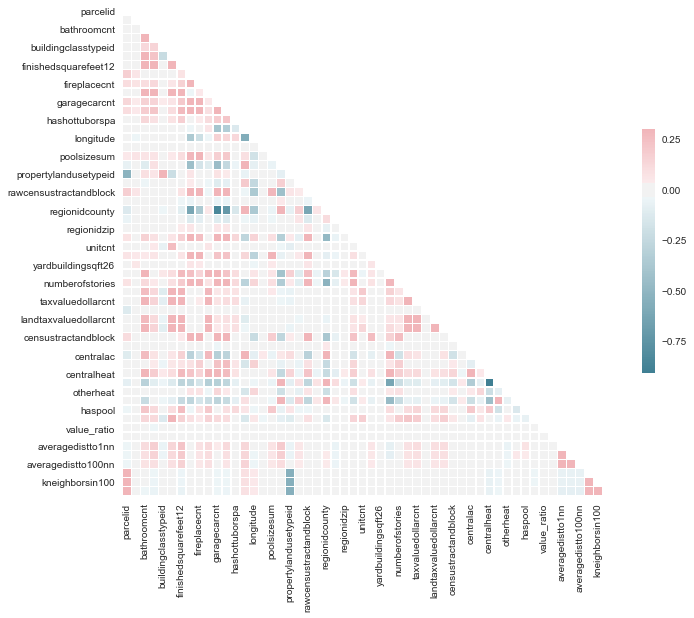

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr = properties_2016_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

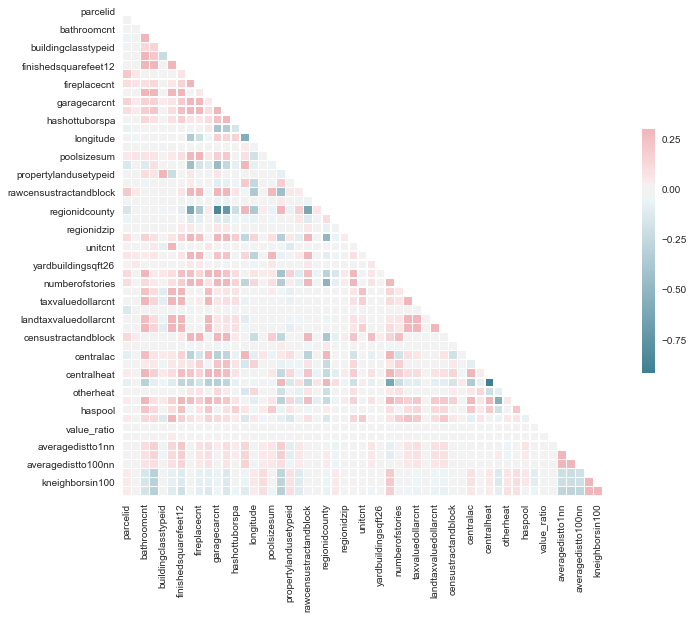

In [13]:
sns.set(style="white")

# Compute the correlation matrix
corr = properties_2017_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
merged_2016_df = pd.merge(training_2016_df, properties_2016_df, on='parcelid', how='left')
merged_2017_df = pd.merge(training_2017_df, properties_2017_df, on='parcelid', how='left')

In [29]:
merged_df = merged_2016_df.append(merged_2017_df)

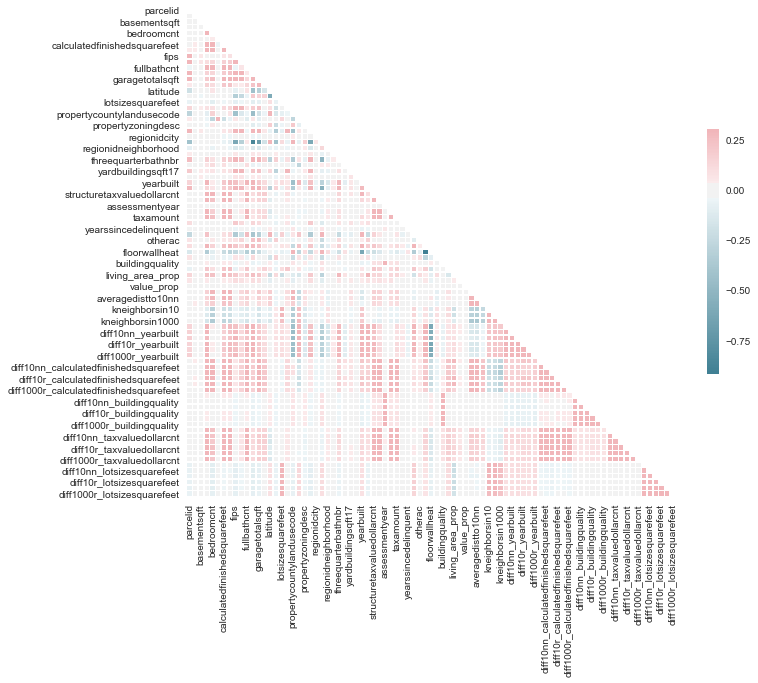

In [30]:
sns.set(style="white")

# Compute the correlation matrix
corr = merged_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
properties_2016_df.to_csv(DirBase+"Input/properties_2016_mod.csv", index=False)
properties_2017_df.to_csv(DirBase+"Input/properties_2017_mod.csv", index=False)

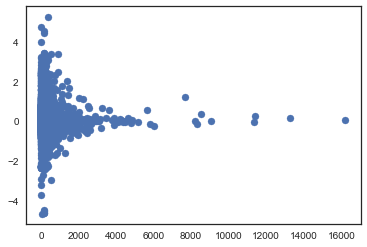

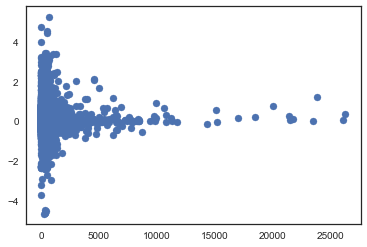

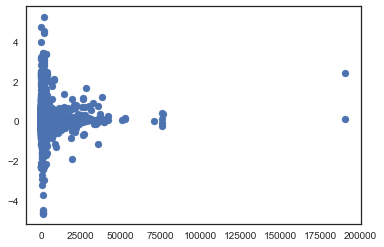

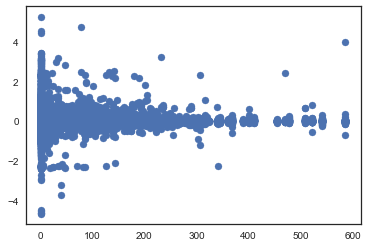

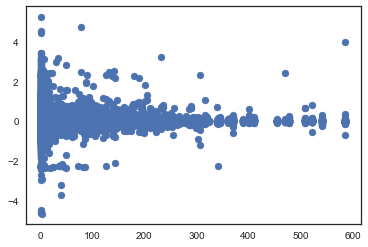

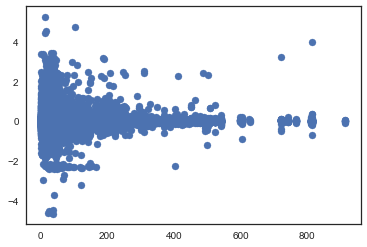

In [19]:
plt.close()
plt.scatter(merged_df['averagedistto1nn'], merged_df['logerror'])
plt.show()

plt.close()
plt.scatter(merged_df['averagedistto10nn'], merged_df['logerror'])
plt.show()

plt.close()
plt.scatter(merged_df['averagedistto100nn'], merged_df['logerror'])
plt.show()

plt.close()
plt.scatter(merged_df['kneighborsin10'], merged_df['logerror'])
plt.show()

plt.close()
plt.scatter(merged_df['kneighborsin100'], merged_df['logerror'])
plt.show()

plt.close()
plt.scatter(merged_df['kneighborsin1000'], merged_df['logerror'])
plt.show()

In [23]:
from sklearn import neighbors

def average_in_radius( df, base, target, radius):
    X = df[base]
    y = df[target]
    
    logging.debug("FITTING...")
    clf = neighbors.RadiusNeighborsRegressor(radius)
    clf.fit(X, y)
    
    logging.debug("PREDICTING...")
    z = clf.predict(X)
    
    return z

In [24]:
from sklearn import neighbors

def average_of_k( df, base, target, n_neighbors):
    X = df[base]
    y = df[target]
    
    logging.debug("FITTING...")
    clf = neighbors.KNeighborsRegressor(n_neighbors)
    clf.fit(X, y)
    
    logging.debug("PREDICTING...")
    z = clf.predict(X)
    
    return z

_Now for these new 6 variables I also want to add the averages of 'yearbuilt', 'calculatedfinishedsqft', 'buildingquality', 'taxvaluedollarcnt', and 'lotsizesqft'._

In [27]:
targets = ['lotsizesquarefeet']

for t in targets:
    logging.debug(t.upper() + "...")
    
    logging.debug("1NN...")
    name = "diff1nn_"+t
    properties_2016_df[name] = average_of_k(properties_2016_df, ['latitude', 'longitude'], t, 1)
    properties_2017_df[name] = average_of_k(properties_2017_df, ['latitude', 'longitude'], t, 1)

    logging.debug("10NN...")
    name = "diff10nn_"+t
    properties_2016_df[name] = average_of_k(properties_2016_df, ['latitude', 'longitude'], t, 10)
    properties_2017_df[name] = average_of_k(properties_2017_df, ['latitude', 'longitude'], t, 10)
    
    logging.debug("100NN...")
    name = "diff100nn_"+t
    properties_2016_df[name] = average_of_k(properties_2016_df, ['latitude', 'longitude'], t, 100)
    properties_2017_df[name] = average_of_k(properties_2017_df, ['latitude', 'longitude'], t, 100)
    
    logging.debug("10R...")
    name = "diff10r_"+t
    properties_2016_df[name] = average_in_radius(properties_2016_df, ['latitude', 'longitude'], t, 10)
    properties_2017_df[name] = average_in_radius(properties_2017_df, ['latitude', 'longitude'], t, 10)

    logging.debug("100R...")
    name = "diff100r_"+t
    properties_2016_df[name] = average_in_radius(properties_2016_df, ['latitude', 'longitude'], t, 100)
    properties_2017_df[name] = average_in_radius(properties_2017_df, ['latitude', 'longitude'], t, 100)
    
    logging.debug("1000R...")
    name = "diff1000r_"+t
    properties_2016_df[name] = average_in_radius(properties_2016_df, ['latitude', 'longitude'], t, 1000)
    properties_2017_df[name] = average_in_radius(properties_2017_df, ['latitude', 'longitude'], t, 1000)

DEBUG:root:LOTSIZESQUAREFEET...
DEBUG:root:1NN...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:10NN...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:100NN...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:10R...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:100R...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:1000R...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
DEBUG:root:FITTING...
DEBUG:root:PREDICTING...
